In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
# for plots and figures
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
# for preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from collections import Counter 
# for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# for machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# for evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ML ICA - Khinsa F Zahirah C2357551.csv');
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
df.shape

(1941, 34)

In [4]:
df.columns


Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [6]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(df.duplicated().sum())

0


In [8]:
# target columns are the last seven
targets = df.iloc[:, 27:]
df.drop(targets.columns, axis=1, inplace=True) # drop all defects column
df['Target'] = targets.idxmax(1) # add a 'Target' column to our dataset describing which record has a particular defect
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


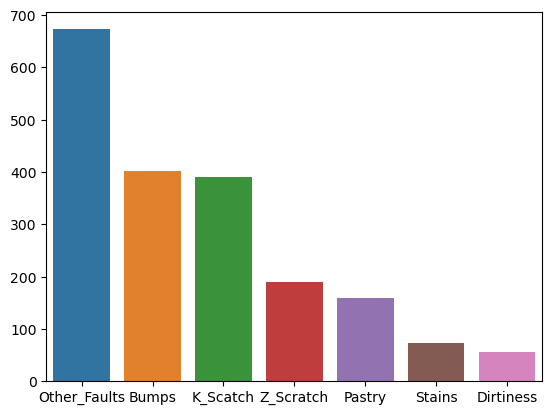

In [9]:
target_counts= df['Target'].value_counts()

sns.color_palette("mako")
fig, ax = plt.subplots()
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values)


<Axes: >

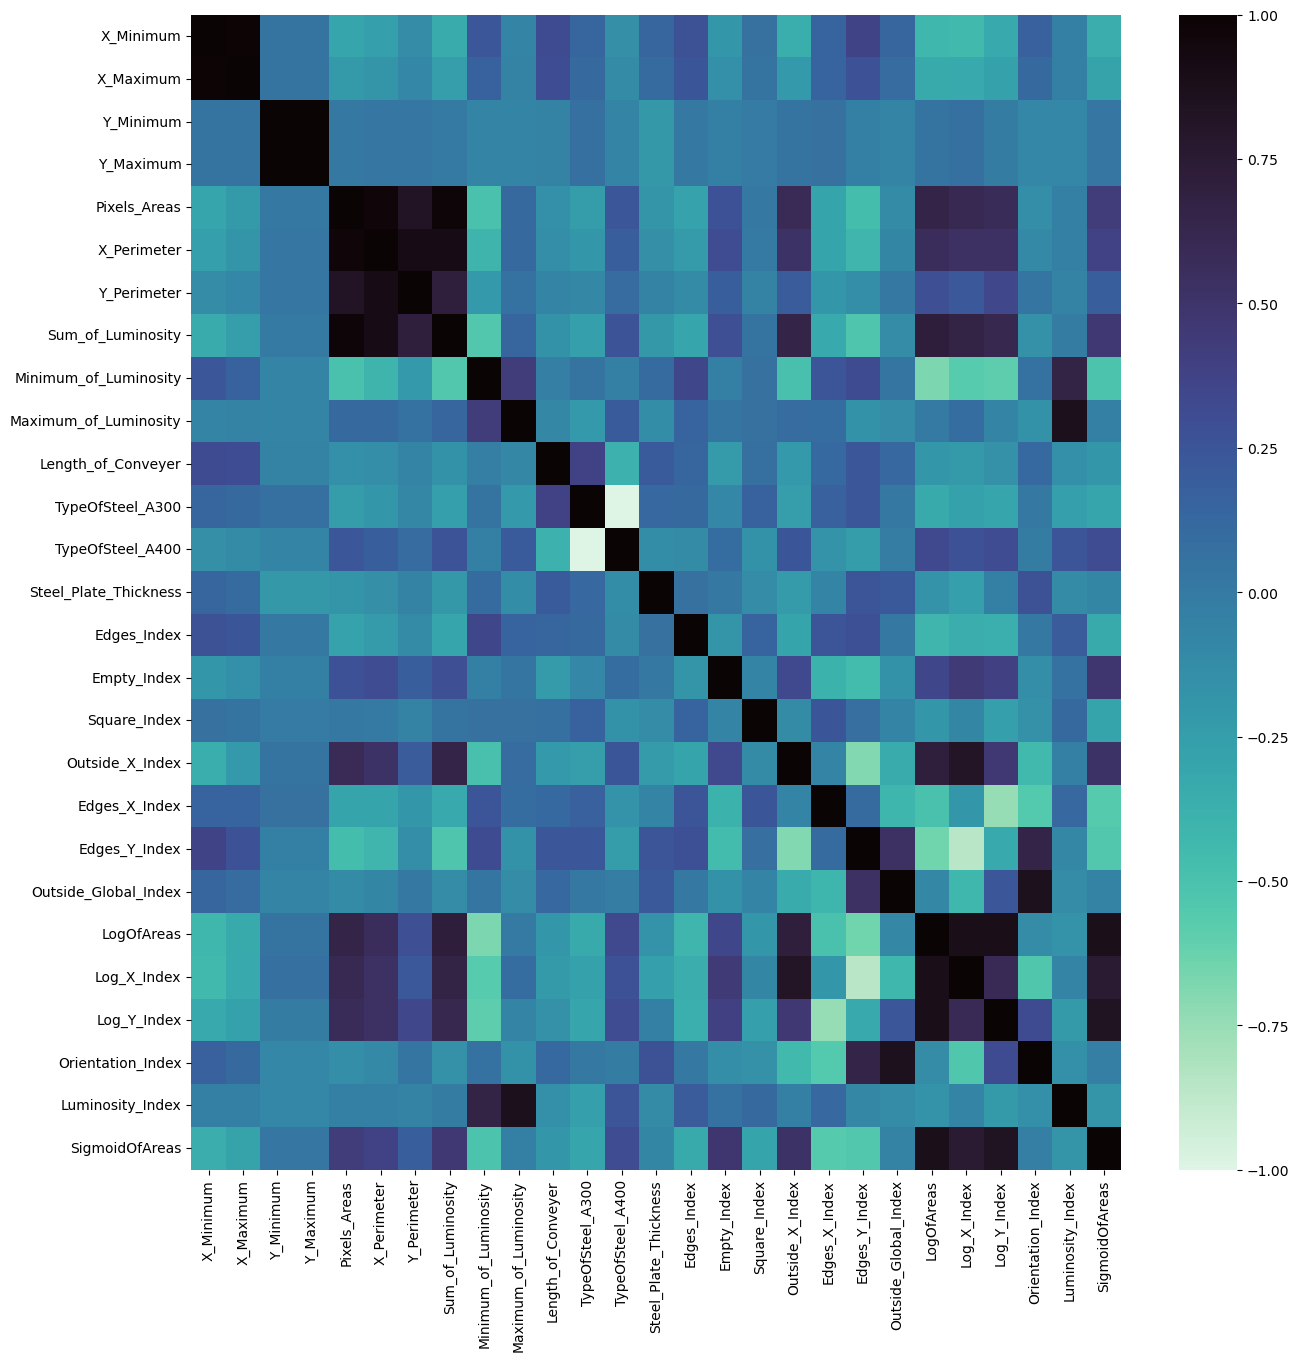

In [10]:
sns.set_palette('pastel')
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='mako_r')

In [11]:
# convert Target column to numerical
df['Target'] = pd.Categorical(df['Target'])
df['Target_Code'] = df.Target.cat.codes
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target,Target_Code
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,4


In [12]:
df.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Code
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,-0.155906
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,-0.179694
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,-0.139695
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,-0.139694
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076184
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.056565
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.018765
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.086180
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.086158
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.099244


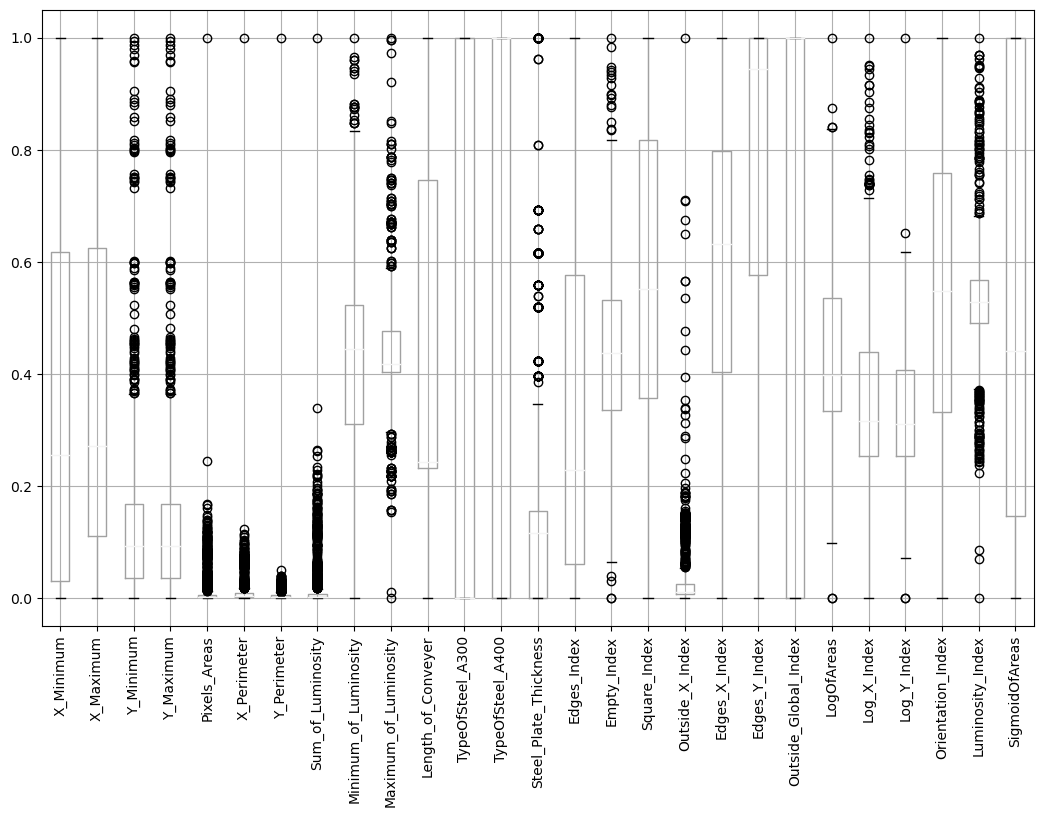

In [13]:
# boxplot
sc = MinMaxScaler(feature_range =(0,1))

X = df.iloc[:, :27]
y = df['Target']

X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

In [14]:
# remove outlier using DBSCAN
ep = 0.1
while ep < 10:
    dbscan_model = DBSCAN(eps=ep, min_samples=7).fit(X_std) 
    
    if Counter(dbscan_model.labels_)[-1] < 0.1*len(X_std):
        print('The neighbourhood distance for removing less than 10% outliers is: {}'.format(ep))
        break
        
    ep = ep + 0.1

The neighbourhood distance for removing less than 10% outliers is: 0.6


In [15]:
dbscan_model = DBSCAN(eps=ep, min_samples=7).fit(X_std)

outliers = X_std[dbscan_model.labels_ == -1]

outliers.shape

(144, 27)

In [16]:
# drop the outliers
X_std.drop(outliers.index, axis=0, inplace=True)
y.drop(outliers.index, axis=0, inplace=True)

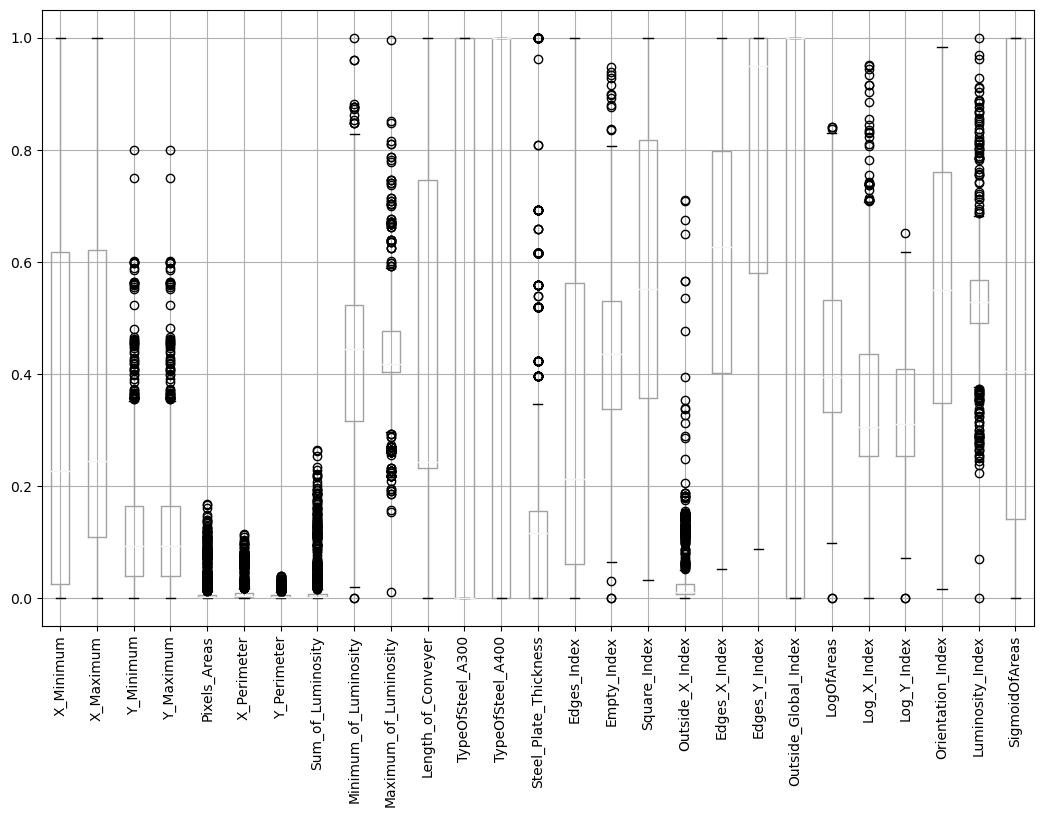

In [17]:
# new box plot 
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

In [18]:
X_std.shape

(1797, 27)

In [19]:
# ML
# splitting to Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.80, random_state = 25)

Feature: 0, Score: 0.03319
Feature: 1, Score: 0.02554
Feature: 2, Score: 0.02362
Feature: 3, Score: 0.04108
Feature: 4, Score: 0.06592
Feature: 5, Score: 0.02124
Feature: 6, Score: 0.01212
Feature: 7, Score: 0.01240
Feature: 8, Score: 0.02226
Feature: 9, Score: 0.04509
Feature: 10, Score: 0.12044
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.03628
Feature: 13, Score: 0.07092
Feature: 14, Score: 0.03476
Feature: 15, Score: 0.03314
Feature: 16, Score: 0.03620
Feature: 17, Score: 0.01902
Feature: 18, Score: 0.02609
Feature: 19, Score: 0.02457
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01176
Feature: 22, Score: 0.21348
Feature: 23, Score: 0.01769
Feature: 24, Score: 0.02513
Feature: 25, Score: 0.02599
Feature: 26, Score: 0.00207


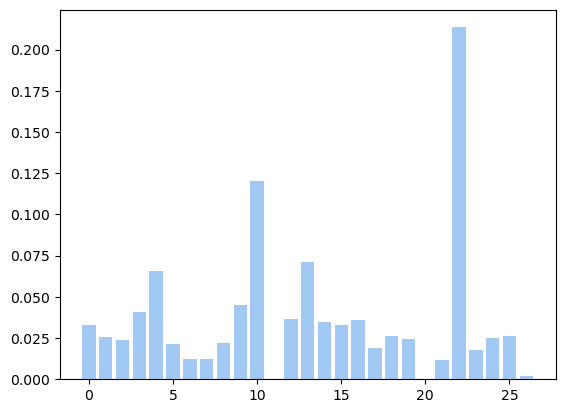

In [20]:
# Decision Tree for feature extraction
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

# feature importance
importance = DTC.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [21]:
# using only features with > 0.03 score
X_feat = X_std.drop(X_std.columns[[0,1,2,5,6,7,8,11,17,19,20,21,23,24,25,26]],axis = 1)
X_feat.shape

(1797, 11)

In [22]:
# ML after feature extraction
X = X_feat
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 25)

In [23]:
# Decision Tree
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

y_pred_DTC = DTC.predict(X_test)

# evaluation report and matrix
print(classification_report(y_test, y_pred_DTC))
print(confusion_matrix(y_test, y_pred_DTC))
# accuracy score
print('accuracy is',accuracy_score(y_pred_DTC,y_test))
# ROC AUC score
print('ROC AUC score is',roc_auc_score(y_test, DTC.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

       Bumps       0.61      0.66      0.63        65
   Dirtiness       0.90      0.69      0.78        13
    K_Scatch       0.89      0.93      0.91        76
Other_Faults       0.74      0.70      0.72       122
      Pastry       0.57      0.57      0.57        28
      Stains       0.93      0.88      0.90        16
   Z_Scratch       0.95      0.95      0.95        40

    accuracy                           0.77       360
   macro avg       0.80      0.77      0.78       360
weighted avg       0.77      0.77      0.77       360

[[43  0  0 18  1  1  2]
 [ 2  9  0  1  1  0  0]
 [ 2  0 71  3  0  0  0]
 [18  1  7 86 10  0  0]
 [ 5  0  1  6 16  0  0]
 [ 1  0  0  1  0 14  0]
 [ 0  0  1  1  0  0 38]]
accuracy is 0.7694444444444445
ROC AUC score is 0.8634688621206522


[[43  0  0 18  1  1  2]
 [ 2  9  0  1  1  0  0]
 [ 2  0 71  3  0  0  0]
 [18  1  7 86 10  0  0]
 [ 5  0  1  6 16  0  0]
 [ 1  0  0  1  0 14  0]
 [ 0  0  1  1  0  0 38]]


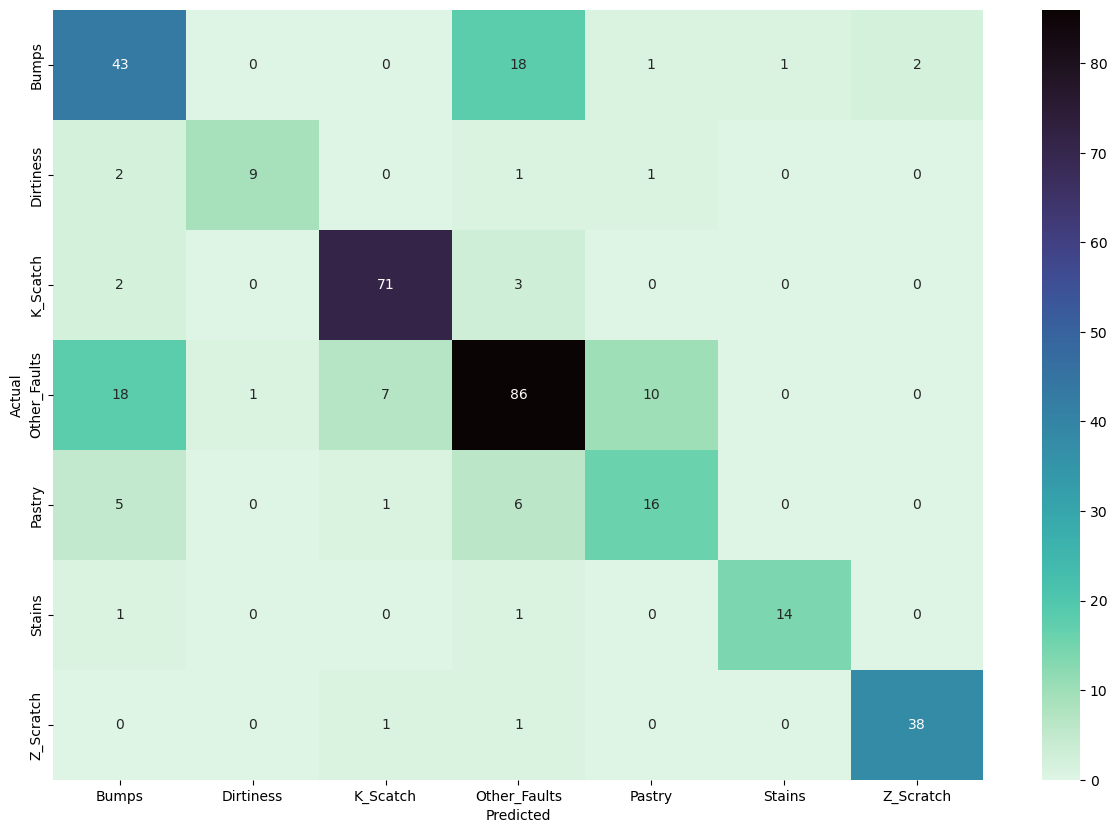

In [24]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_DTC)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='mako_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
# Random Forest
# fine tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_estimators': [125, 150, 175, 200],
    'max_features': ['sqrt', 'log2', None, 'auto'],
    'max_depth': [15, 35, 55, 75],
    'max_leaf_nodes': [100, 125, 150, 175],
}

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=55, max_features='auto', max_leaf_nodes=175,
                       n_estimators=175)


In [36]:
# Random Forest after fine tuning
rfc = RandomForestClassifier(max_depth=55, max_features='auto', max_leaf_nodes=175,
                       n_estimators=175)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
# evaluation report and matrix
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
# accuracy score
print('accuracy is',accuracy_score(y_pred_rfc,y_test))
# ROC AUC score
print('ROC AUC score is',roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

       Bumps       0.70      0.75      0.73        65
   Dirtiness       0.85      0.85      0.85        13
    K_Scatch       0.97      0.96      0.97        76
Other_Faults       0.79      0.79      0.79       122
      Pastry       0.70      0.57      0.63        28
      Stains       1.00      0.88      0.93        16
   Z_Scratch       0.86      0.95      0.90        40

    accuracy                           0.82       360
   macro avg       0.84      0.82      0.83       360
weighted avg       0.83      0.82      0.82       360

[[49  0  0 13  3  0  0]
 [ 2 11  0  0  0  0  0]
 [ 1  0 73  2  0  0  0]
 [12  2  2 96  4  0  6]
 [ 4  0  0  8 16  0  0]
 [ 2  0  0  0  0 14  0]
 [ 0  0  0  2  0  0 38]]
accuracy is 0.825
ROC AUC score is 0.9753789990349685


[[50  0  0 12  3  0  0]
 [ 2 11  0  0  0  0  0]
 [ 1  0 74  1  0  0  0]
 [13  2  2 95  3  0  7]
 [ 4  0  0  9 15  0  0]
 [ 1  0  0  1  0 14  0]
 [ 0  0  0  2  0  0 38]]


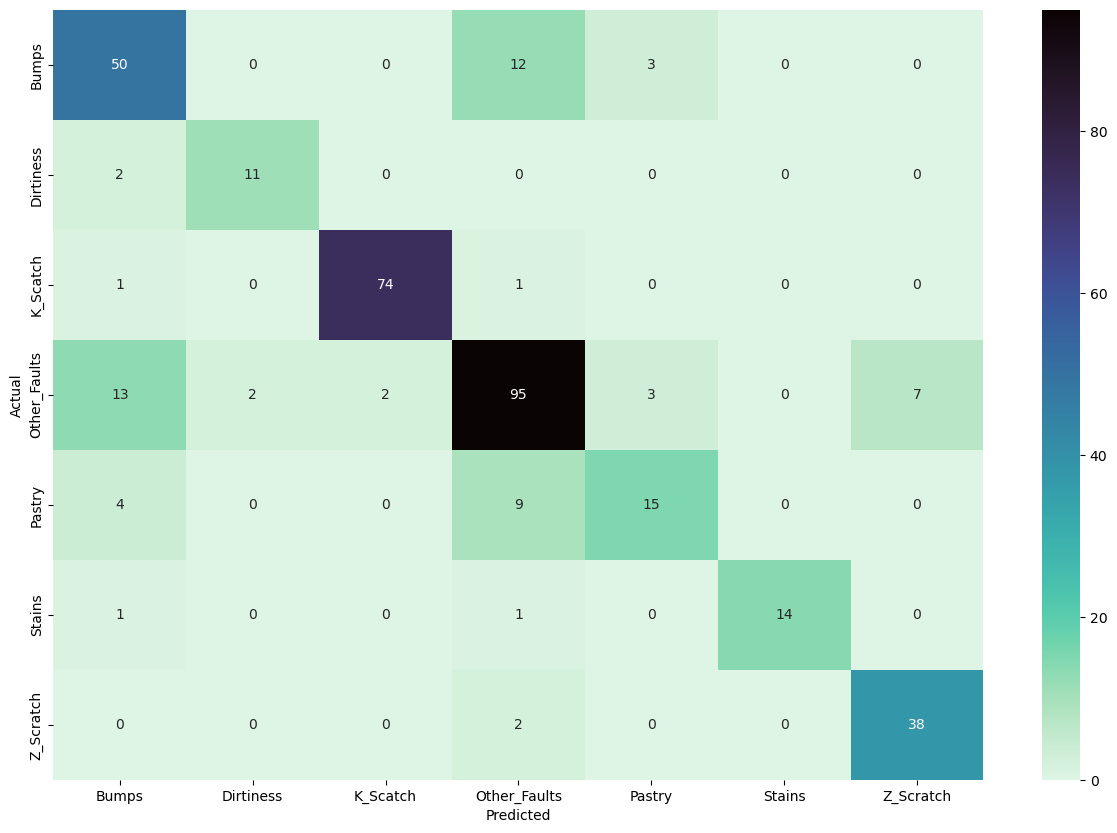

In [33]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='mako_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Text(0, 0.5, 'Accuracy Score')

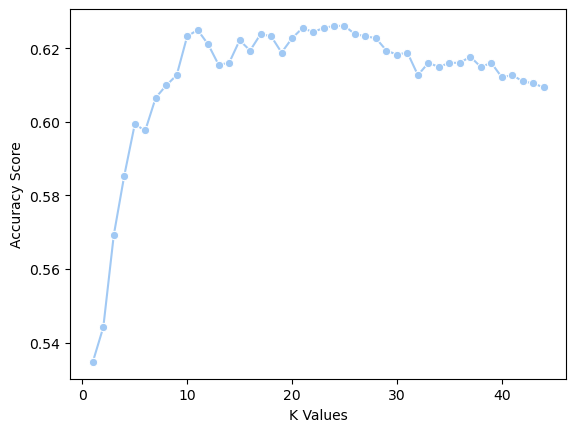

In [28]:
# KNN
# finding best k-values
k_values = [i for i in range (1,45)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

# plotting
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [34]:
# KNN
KNN_C = KNeighborsClassifier(n_neighbors=21)
KNN_C.fit(X_train, y_train)

y_pred_knn = KNN_C.predict(X_test)

# evaluation report and matrix
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
# accuracy score
print('accuracy is',accuracy_score(y_pred_knn,y_test))
# ROC AUC score
print('ROC AUC score is',roc_auc_score(y_test, KNN_C.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

       Bumps       0.54      0.69      0.61        65
   Dirtiness       0.73      0.85      0.79        13
    K_Scatch       0.95      0.92      0.93        76
Other_Faults       0.68      0.61      0.64       122
      Pastry       0.63      0.43      0.51        28
      Stains       0.83      0.62      0.71        16
   Z_Scratch       0.71      0.85      0.77        40

    accuracy                           0.71       360
   macro avg       0.72      0.71      0.71       360
weighted avg       0.72      0.71      0.71       360

[[45  0  0 15  1  1  3]
 [ 1 11  0  1  0  0  0]
 [ 1  0 70  4  0  1  0]
 [27  4  3 74  6  0  8]
 [ 5  0  0  8 12  0  3]
 [ 2  0  1  3  0 10  0]
 [ 2  0  0  4  0  0 34]]
accuracy is 0.7111111111111111
ROC AUC score is 0.941123076898194


[[45  0  0 15  1  1  3]
 [ 1 11  0  1  0  0  0]
 [ 1  0 70  4  0  1  0]
 [27  4  3 74  6  0  8]
 [ 5  0  0  8 12  0  3]
 [ 2  0  1  3  0 10  0]
 [ 2  0  0  4  0  0 34]]


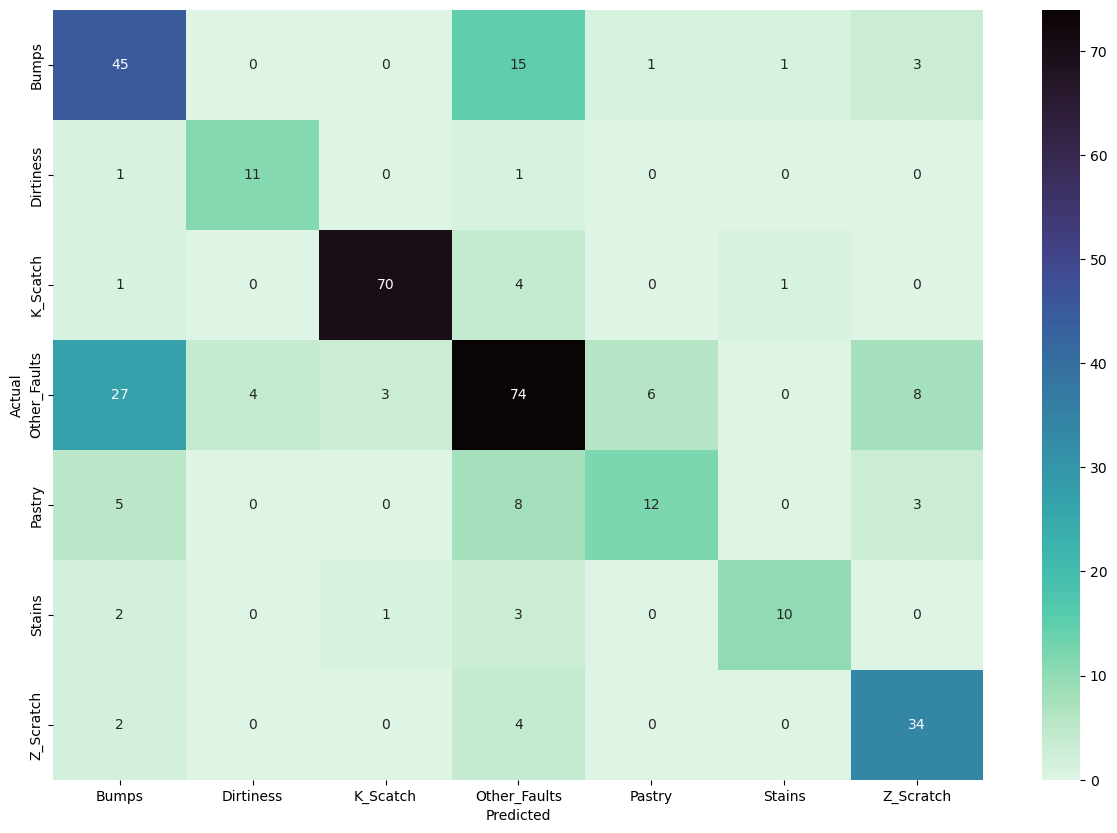

In [30]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='mako_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

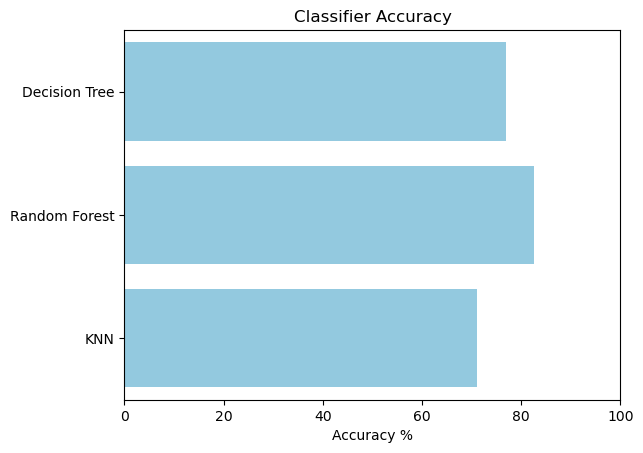

In [35]:
# summary of three models
# accuracy
acc=[accuracy_score(y_pred_DTC,y_test),accuracy_score(y_pred_rfc,y_test),accuracy_score(y_pred_knn,y_test)]
models = ['Decision Tree', 'Random Forest', 'KNN']
acc_ = np.array(acc)*100

# plotting
sns.barplot(x=acc_, y=models, color="skyblue")
plt.xlim([0,100])
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()